In [9]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize
import ase

In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [6]:
KS_KE = []
for i in np.arange(0,30,1):
    with open('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_ke = str(k).split()[6]
    KS_KE.append(float(KS_ke)) 
ks_ke = np.asarray(KS_KE)

In [7]:
def min_energy(x0, *args):
        KS_KE, rho = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        OF_KE = KE(rho).energy
        diff = np.abs(KS_KE*1/2-OF_KE)
        return diff

In [10]:
l = np.linspace(0.8, 1.4, 30)
delta_E = []
R0 = []
vol = []
for n in np.arange(0,30,1):
    i = int(n)
    rho = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(ase.io.read('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DATA2/Si'+str(i)+'.in'))
    KS_KE = ks_ke[i]
    minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.001,0.9]], options={'ftol' : 1e-6})
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn.fun)
    R0.append(minn.x)

Text(0, 0.5, '$ρ_{0}$')

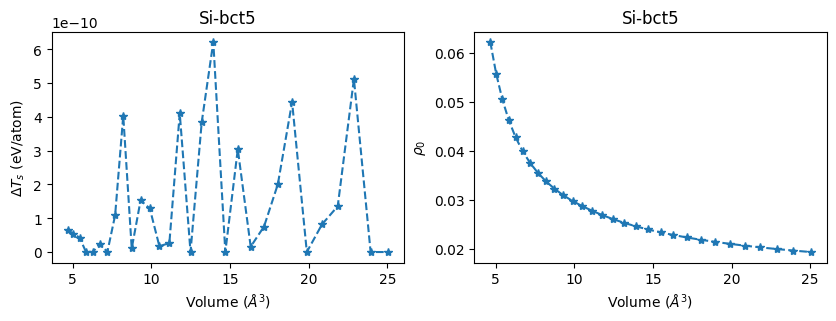

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-bct5')
axs[1].set_title('Si-bct5')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [13]:
pwd

'/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5'

In [15]:
np.save("/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DATA2/rho0.npy", np.asarray(R0))